In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob 
import os 
import cv2
import math
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
images = glob.glob('/content/gdrive/MyDrive/dataset1/train1/*.*')

for i in range(len(images)): 
    try : 
        t = 'image '+str(i)+'.jpg'
        image = cv2.imread(images[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.imwrite('./image_lits/{}'.format(t),cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    except : 
        print(i)

In [ ]:
path = os.path.dirname('/content/gdrive/MyDrive/dataset1/train1/image_chuoi/image 0.jpg')
label = os.path.basename(path)

In [ ]:
data = []
labels = []

for folder in ['image_chuoi','image_cachua','image_carot','image_tao','image_ot','image_tl','image_oi','image_man','image_xoai','image_quyt']:
    images = glob.glob('/content/gdrive/MyDrive/dataset1/train1/%s/*.*'%folder)

    for i in range(len(images)): 
        image = cv2.imread(images[i])
        try : 
            image = cv2.resize(image, (100,100))
            image = tf.keras.preprocessing.image.img_to_array(image)
            data.append(image)
            labels.append(folder)
        except : 
            pass
    print(len(images),folder)

1188 image_chuoi
1424 image_cachua
1400 image_carot
1099 image_tao
1420 image_ot
1399 image_tl
1208 image_oi
1212 image_man
1437 image_xoai
1228 image_quyt


In [ ]:
import numpy as np
import pandas as pd
data = np.array(data)
label = np.array(labels)
print(data.shape)

(13015, 100, 100, 3)


In [ ]:
dict_ = {'image_chuoi':0,
       'image_cachua':1,
       'image_carot':2,
       'image_tao':3,
       'image_ot':4,
       'image_tl':5,
       'image_oi':6,
       'image_man':7,
       'image_xoai':8,
       'image_quyt':9}
label_dict = {0: 'chuoi', 1: 'cachua', 2: 'carot', 3: 'tao',4:'ot',5:'tl',6:'oi',7:'man',8:'xoai',9:'quyt'}
label = np.vectorize(dict_.get)(label)

In [ ]:
label.shape

(13015,)

In [ ]:
 train_images_reshaped = data.reshape((-1, 100, 100,3))
 train_labels_reshaped = to_categorical(label, num_classes=10)

In [ ]:
# Convolution Neural Networks (CNN)
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), padding='same', input_shape = (100,100,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 8)       224       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 33, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 16)        1168      
_________________________________________________________________
batch_normalization (BatchNo (None, 33, 33, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 33, 33, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0

In [ ]:
model.fit(train_images_reshaped, train_labels_reshaped, epochs=100)

Epoch 1/100
407/407 [==============================] - 4s 11ms/step - loss: 0.7150 - accuracy: 0.8032
Epoch 2/100
407/407 [==============================] - 4s 10ms/step - loss: 0.7096 - accuracy: 0.8049
Epoch 3/100
407/407 [==============================] - 4s 10ms/step - loss: 0.7027 - accuracy: 0.8088
Epoch 4/100
407/407 [==============================] - 4s 10ms/step - loss: 0.6998 - accuracy: 0.8079
Epoch 5/100
407/407 [==============================] - 4s 10ms/step - loss: 0.6975 - accuracy: 0.8066
Epoch 6/100
407/407 [==============================] - 4s 10ms/step - loss: 0.6871 - accuracy: 0.8125
Epoch 7/100
407/407 [==============================] - 4s 10ms/step - loss: 0.6802 - accuracy: 0.8138
Epoch 8/100
407/407 [==============================] - 4s 10ms/step - loss: 0.6789 - accuracy: 0.8141
Epoch 9/100
407/407 [==============================] - 4s 10ms/step - loss: 0.6734 - accuracy: 0.8155
Epoch 10/100
407/407 [==============================] - 4s 10ms/step - loss: 0.667

In [ ]:
model.save_weights('/content/gdrive/MyDrive/dataset1/cnn_model1.h5')

In [ ]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/dataset1/train1/',  
        target_size=(100, 100),  
        batch_size=batch_size,
        class_mode='categorical')

model.fit(train_generator,steps_per_epoch=2000 // batch_size,epochs=200)
model.save_weights('/content/gdrive/MyDrive/dataset1/cnn_data_augmentation.h5')  

Found 13015 images belonging to 10 classes.
Epoch 1/200
125/125 [==============================] - 11s 85ms/step - loss: 1.1984 - accuracy: 0.6000
Epoch 2/200
125/125 [==============================] - 10s 83ms/step - loss: 1.1509 - accuracy: 0.6240
Epoch 3/200
125/125 [==============================] - 11s 86ms/step - loss: 1.1657 - accuracy: 0.6260
Epoch 4/200
125/125 [==============================] - 10s 83ms/step - loss: 1.1544 - accuracy: 0.6155
Epoch 5/200
125/125 [==============================] - 10s 83ms/step - loss: 1.1733 - accuracy: 0.6075
Epoch 6/200
125/125 [==============================] - 11s 86ms/step - loss: 1.1487 - accuracy: 0.6145
Epoch 7/200
125/125 [==============================] - 11s 85ms/step - loss: 1.1311 - accuracy: 0.6335
Epoch 8/200
125/125 [==============================] - 10s 82ms/step - loss: 1.1572 - accuracy: 0.6195
Epoch 9/200
125/125 [==============================] - 10s 82ms/step - loss: 1.1680 - accuracy: 0.6170
Epoch 10/200
125/125 [=======

In [ ]:
batch_size = 1
test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/dataset1/test1/',
    color_mode = "rgb",
    target_size=(100, 100),
    batch_size=1, 
    shuffle=True)
y_pred = model.predict(test_generator, 1//batch_size, workers=10)

Found 857 images belonging to 10 classes.


[[6.9444031e-02 3.2049097e-02 2.3582196e-04 4.9986672e-02 8.0926966e-06
  1.0184365e-01 7.6329266e-03 7.2137684e-01 1.7373497e-02 4.9372691e-05]]


Text(0.5, 1.0, 'man')

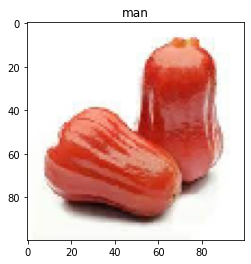

In [ ]:
x_test, y_test = next(test_generator)
p = model.predict(x_test)
print(p)
p = p.argmax()
plt.imshow(x_test[0])
plt.title(label_dict[p])

In [ ]:
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
img_width, img_height = 100, 100  
   
top_model_weights_path = 'bottleneck_fc_model.h5'  
train_data_dir = '/content/gdrive/MyDrive/dataset1/train1/'  
validation_data_dir = '/content/gdrive/MyDrive/dataset1/test1/'  
   
 # number of epochs to train top model  
epochs = 50  
 # batch size used by flow_from_directory and predict_generator  
batch_size = 16

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)  
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  

nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  

predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
bottleneck_features_train = model.predict(generator, predict_size_train)

Found 13015 images belonging to 10 classes.


In [ ]:
np.save('/content/gdrive/MyDrive/dataset1/bottleneck_features_train.npy', bottleneck_features_train)

In [ ]:
print(bottleneck_features_train.shape)

(13015, 3, 3, 512)


In [ ]:
generator = datagen.flow_from_directory(  
     '/content/gdrive/MyDrive/dataset1/test1/',  
     target_size=(100, 100),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples /batch_size))  
   
bottleneck_features_validation = model.predict(  
     generator, predict_size_validation)  
   
np.save('/content/gdrive/MyDrive/dataset1/bottleneck_features_validation.npy', bottleneck_features_validation)

Found 857 images belonging to 10 classes.


In [ ]:
print(bottleneck_features_validation.shape)

(857, 3, 3, 512)


In [ ]:
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
train_data = np.load('/content/gdrive/MyDrive/dataset1/bottleneck_features_train.npy')  
train_labels = generator_top.classes  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 13015 images belonging to 10 classes.


In [ ]:
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('/content/gdrive/MyDrive/dataset1/bottleneck_features_validation.npy')  
   
validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 857 images belonging to 10 classes.


In [ ]:
train_data.shape, train_labels.shape, validation_labels.shape

((13015, 3, 3, 512), (13015, 10), (857, 10))

In [ ]:
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='softmax'))  
   
model.compile(optimizer='rmsprop',  
              loss='categorical_crossentropy', metrics=['accuracy'])  
   
history = model.fit(train_data, train_labels,  
          epochs=25,  
          batch_size=16,  
          validation_data=(validation_data, validation_labels))  
   
model.save_weights('/content/gdrive/MyDrive/dataset1/top_model_weights.h5')  
   
(eval_loss, eval_accuracy) = model.evaluate(  
     validation_data, validation_labels, batch_size=batch_size, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))

Epoch 1/25
814/814 [==============================] - 5s 5ms/step - loss: 0.4533 - accuracy: 0.8535 - val_loss: 0.3451 - val_accuracy: 0.8926
Epoch 2/25
814/814 [==============================] - 4s 4ms/step - loss: 0.2300 - accuracy: 0.9328 - val_loss: 0.2894 - val_accuracy: 0.9230
Epoch 3/25
814/814 [==============================] - 4s 4ms/step - loss: 0.1836 - accuracy: 0.9475 - val_loss: 0.2587 - val_accuracy: 0.9393
Epoch 4/25
814/814 [==============================] - 4s 4ms/step - loss: 0.1550 - accuracy: 0.9566 - val_loss: 0.1839 - val_accuracy: 0.9533
Epoch 5/25
814/814 [==============================] - 4s 4ms/step - loss: 0.1306 - accuracy: 0.9640 - val_loss: 0.2261 - val_accuracy: 0.9428
Epoch 6/25
814/814 [==============================] - 4s 4ms/step - loss: 0.1303 - accuracy: 0.9659 - val_loss: 0.1766 - val_accuracy: 0.9603
Epoch 7/25
814/814 [==============================] - 4s 4ms/step - loss: 0.1279 - accuracy: 0.9683 - val_loss: 0.1931 - val_accuracy: 0.9475
Epoch 

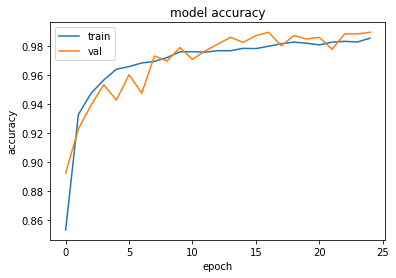

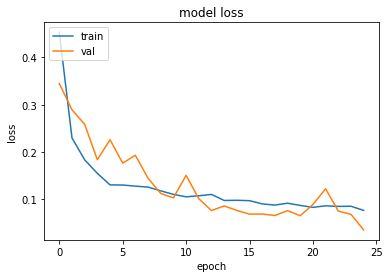

In [ ]:
import sys
from matplotlib import pyplot as plt
 
# Plot diagnostic learning curves
def summarize_diagnostics(history):

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()



# Learning curves
summarize_diagnostics(history)

In [114]:
def load_img(path):
    image_path = path

    orig = cv2.imread(image_path)  
    plt.imshow(orig)
    image = cv2.resize(orig, (100,100))  
    image = tf.keras.preprocessing.image.img_to_array(image)  

    image = image / 255  

    image = np.expand_dims(image, axis=0)
    return image

In [115]:
def predict_img(image):
    # build the VGG16 network  
    model = tf.keras.applications.VGG16(include_top=False, weights='imagenet')  

    bottleneck_prediction = model.predict(image)  

    model = Sequential()  
    model.add(Flatten(input_shape=bottleneck_prediction.shape[1:]))  
    model.add(Dense(256, activation='relu'))  
    model.add(Dropout(0.9))  
    model.add(Dense(num_classes, activation='sigmoid'))  

    model.load_weights('/content/gdrive/MyDrive/dataset1//top_model_weights.h5')  

    class_predicted = np.argmax(model.predict(bottleneck_prediction),axis=-1)
    return label_dict[class_predicted[0]]

'chuoi'

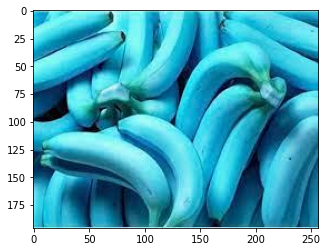

In [116]:
predict_img(load_img('/content/gdrive/MyDrive/dataset1/test1/image_chuoi/image 5.jpg'))

'man'

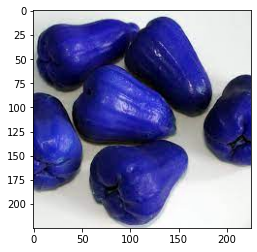

In [97]:
predict_img(load_img('/content/gdrive/MyDrive/dataset1/test1/image_man/image 15.jpg'))

'quyt'

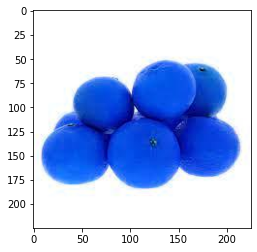

In [128]:
predict_img(load_img('/content/gdrive/MyDrive/dataset1/test1/image_quyt/image 14.jpg'))